In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.svm import SVR
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,20

In [2]:
df = pd.read_csv('sensex.csv', parse_dates = ['Date'], index_col = 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-20,27232.689453,27264.410156,27009.810547,27034.500000,27034.500000,8800.0
2017-01-23,26990.929688,27167.789063,26963.580078,27117.339844,27117.339844,6600.0
2017-01-24,27170.880859,27393.349609,27140.849609,27375.580078,27375.580078,6800.0
2017-01-25,27462.830078,27736.830078,27439.679688,27708.140625,27708.140625,12200.0
2017-01-27,27761.029297,27980.390625,27759.480469,27882.460938,27882.460938,14300.0


In [3]:
data = df.drop(['High', 'Open'], axis = 1)

In [4]:
 df = data.drop(['Low', 'Volume'], axis = 1)
 df

,Close,Adj Close
Date,,
2017-01-20,27034.500000,27034.500000
2017-01-23,27117.339844,27117.339844
2017-01-24,27375.580078,27375.580078
2017-01-25,27708.140625,27708.140625
2017-01-27,27882.460938,27882.460938
2017-01-30,27849.560547,27849.560547
2017-01-31,27655.960938,27655.960938
2017-02-01,28141.640625,28141.640625
2017-02-02,28226.609375,28226.609375


In [5]:
df = df.drop(['Adj Close'], axis = 1)

In [6]:
df = df['2017-01-25' : ]
df[df==np.inf]=np.nan
#df.fillna(df.mean(), inplace=True)
df.dropna()

,Close
Date,
2017-01-25,27708.140625
2017-01-27,27882.460938
2017-01-30,27849.560547
2017-01-31,27655.960938
2017-02-01,28141.640625
2017-02-02,28226.609375
2017-02-03,28240.519531
2017-02-06,28439.279297
2017-02-07,28335.160156


In [7]:
df = df.dropna()
df.asfreq('D', method="pad")


,Close
Date,
2017-01-25,27708.140625
2017-01-26,27708.140625
2017-01-27,27882.460938
2017-01-28,27882.460938
2017-01-29,27882.460938
2017-01-30,27849.560547
2017-01-31,27655.960938
2017-02-01,28141.640625
2017-02-02,28226.609375


In [8]:
Y = df.values
Y.size


490

In [9]:
X = np.array(range(490)).reshape(-1, 1)
X.shape

(490, 1)

# SUPPORT VECTOR REGRESSION


In [10]:
svr = SVR(kernel='rbf', C=10000, gamma=0.1)

In [11]:
svr.fit(X[:480], Y[:480])

/home/umang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

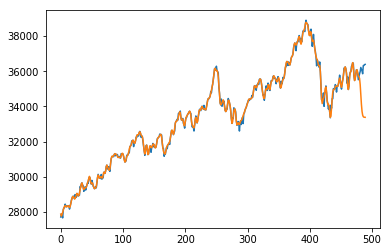

In [12]:
plt.plot(Y)
plt.plot(svr.predict(X))

In [13]:
rms=np.sqrt(np.mean(np.power((Y[480:]-svr.predict(X[480:])),2)))
rms

2257.579877097429

# DIFFERENCING AND AUTO-CORRELATION

In [14]:
df_diff = df.diff(periods = 2)
df_diff

,Close
Date,
2017-01-25,NaN
2017-01-27,NaN
2017-01-30,141.419922
2017-01-31,-226.500000
2017-02-01,292.080078
2017-02-02,570.648437
2017-02-03,98.878906
2017-02-06,212.669922
2017-02-07,94.640625


/home/umang/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


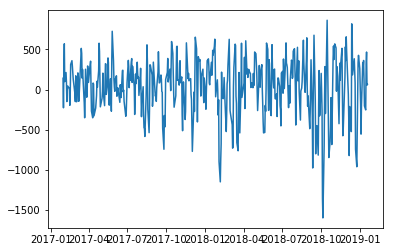

In [15]:
plt.plot(df_diff)


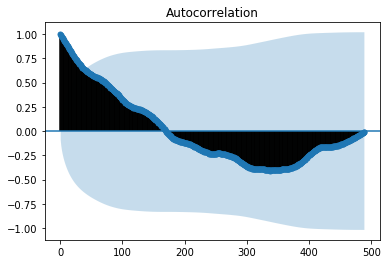

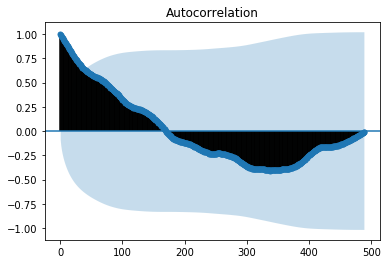

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

In [17]:
df_diff = df.diff(periods = 1)

In [18]:
df_diff = df_diff[1:]
df_diff.head()

,Close
Date,
2017-01-27,174.320313
2017-01-30,-32.900391
2017-01-31,-193.599609
2017-02-01,485.679687
2017-02-02,84.968750


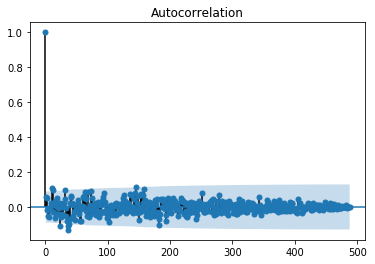

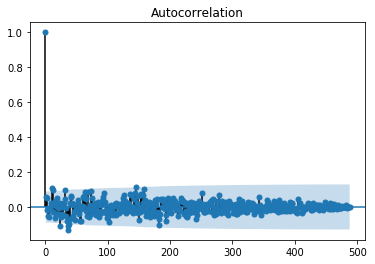

In [19]:
plot_acf(df_diff)



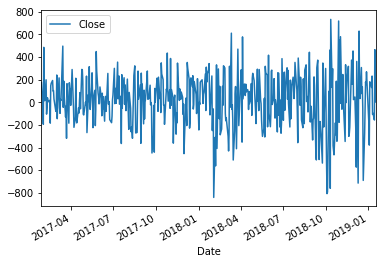

In [20]:
df_diff.plot()

# AUTO REGRESSION

In [21]:
X = df.values
X.size

490

In [22]:
train = X[:480]
test = X[480 : ]
predictions = []

In [23]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

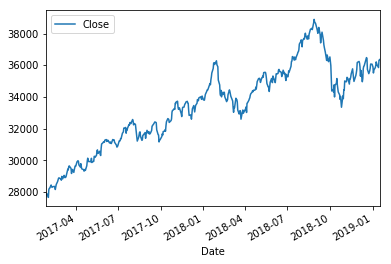

In [24]:
predictions = model_ar_fit.predict(start=480, end = 489)
df.plot()

In [25]:
test


array([[35850.160156],
       [35980.929688],
       [36212.910156],
       [36106.5     ],
       [36009.839844],
       [35853.558594],
       [36318.328125],
       [36321.289063],
       [36374.078125],
       [36386.609375]])

In [26]:
predictions

array([35649.26896003, 35527.65125232, 35468.0656927 , 35480.31452737,
       35522.99589582, 35573.17729154, 35585.95321506, 35544.19269001,
       35493.50807376, 35514.65553637])

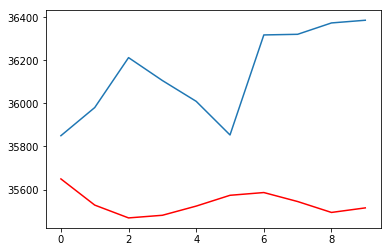

In [27]:
%matplotlib inline
plt.plot(test)
plt.plot(predictions,color='red')

In [28]:
mean_squared_error(test, predictions)

418430.97316287796

# ARIMA

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
model_arima = ARIMA(train,order=(6,1,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

6588.14931330665


In [40]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([35571.77539461, 35533.21877748, 35404.40966716, 35406.71892598,
       35479.66734983, 35538.31604529, 35718.79566224, 35815.61271795,
       35861.76540936, 35902.46245368])

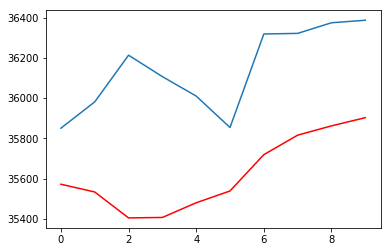

In [41]:
plt.plot(test)
plt.plot(predictions,color='red')

In [33]:
mean_squared_error(test, predictions)

370729.20118041465

In [34]:
rms=np.sqrt(np.mean(np.power((test-predictions),2)))
rms

602.2936946523329

In [37]:
import itertools
p=q=range(0,10)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 1, 8),
 (1, 1, 9),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (2, 1, 8),
 (2, 1, 9),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (3, 1, 8),
 (3, 1, 9),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (4, 1, 8),
 (4, 1, 9),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (5, 1, 8),
 (5, 1, 9),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (6, 1, 8),
 (6, 1, 9),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7),
 (7, 1, 8),
 (7, 1, 9),
 (8, 1, 0),
 (8, 1, 1),
 (8, 1, 2),
 (8,

In [38]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    
    

(0, 1, 0) 6593.25435677305
(0, 1, 1) 6593.882407975104
(0, 1, 2) 6594.343431948159
(0, 1, 3) 6596.331554460822
(0, 1, 4) 6598.295505240546
(0, 1, 5) 6599.471258841172
(0, 1, 6) 6599.872284704869
(0, 1, 7) 6601.593563170442
(0, 1, 8) 6603.390714180529
(0, 1, 9) 6605.240956438907
(1, 1, 0) 6593.731866665726
(1, 1, 1) 6595.0950933433005
(2, 1, 0) 6594.392714646626
(2, 1, 1) 6596.262748793967
(3, 1, 0) 6596.280564305932
(3, 1, 1) 6596.491716163315
(3, 1, 2) 6593.702031253731
(3, 1, 3) 6595.310348921107
(4, 1, 0) 6598.268934473116
(4, 1, 1) 6599.47592733348
(4, 1, 2) 6600.344503731793
(4, 1, 3) 6591.216801563266
(4, 1, 4) 6591.3732656952625
(5, 1, 0) 6598.933942583519
(5, 1, 1) 6599.949320807213
(5, 1, 2) 6594.931282899886
(5, 1, 3) 6595.972008304952
(5, 1, 4) 6586.449069122537
(6, 1, 0) 6599.297962889035
(6, 1, 1) 6601.232098785898
(6, 1, 2) 6596.68776596375
(6, 1, 3) 6599.47099609823
(6, 1, 4) 6588.14931330665
(6, 1, 5) 6589.365062680149
(6, 1, 6) 6588.993675145335
(7, 1, 0) 6601.19425892

# Normalizing


In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Y)

In [75]:
scaled_data

array([[0.00464205],
       [0.02015005],
       [0.01722314],
       [0.        ],
       [0.04320737],
       [0.05076642],
       [0.0520039 ],
       [0.0696861 ],
       [0.06042339],
       [0.05639869],
       [0.05993757],
       [0.06034242],
       [0.06188762],
       [0.06079262],
       [0.04444572],
       [0.05740838],
       [0.0723079 ],
       [0.08946258],
       [0.09835972],
       [0.10753365],
       [0.11004771],
       [0.1029227 ],
       [0.09673441],
       [0.11818953],
       [0.10531653],
       [0.10466356],
       [0.12385639],
       [0.11953023],
       [0.11084559],
       [0.11326461],
       [0.11478584],
       [0.15894695],
       [0.1549862 ],
       [0.17168808],
       [0.17730524],
       [0.16571785],
       [0.16275619],
       [0.13448656],
       [0.14911918],
       [0.15705823],
       [0.14066686],
       [0.15600128],
       [0.16684674],
       [0.17716554],
       [0.17477067],
       [0.200545  ],
       [0.20624035],
       [0.202

In [76]:
index = np.array(range(490)).reshape(-1, 1)
index.shape

(490, 1)

In [77]:
svr = SVR(kernel='rbf', C=100000, gamma=0.3)

In [78]:
svr.fit(index[:480], scaled_data[:480])

/home/umang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.3,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

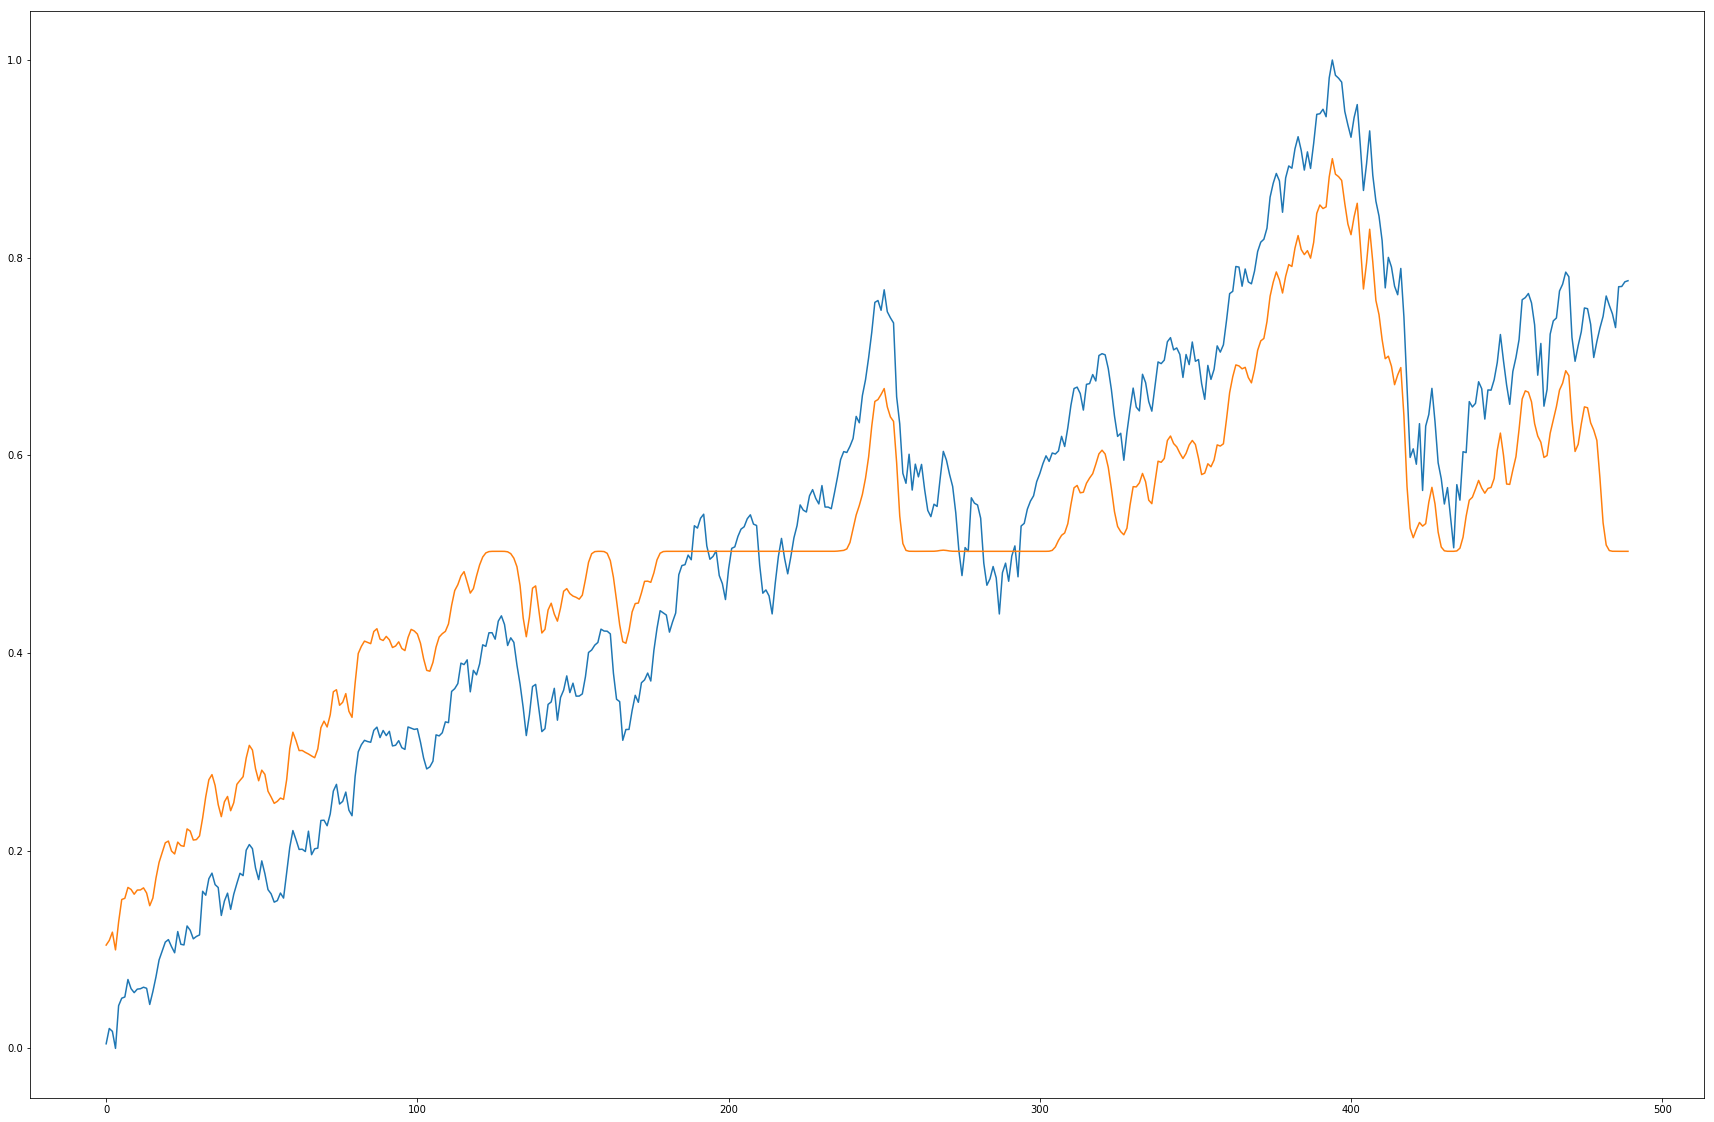

In [79]:
plt.plot(scaled_data)
plt.plot(svr.predict(index))

In [82]:
rms=np.sqrt(np.mean(np.power((scaled_data[480:]-svr.predict(index[480:])),2)))
rms

0.2427035150006768